In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000706129"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000706129
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,HORIZON BANCORP INC /IN/
Ticker,HBNC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,2.056596e+01,4.876425e+00,12.27,17.14,19.75,23.28,32.2
interest income,44.0,2.264300e+07,8.820301e+06,11795000.00,16767750.00,19405000.00,25051000.00,45373000.0
net income,46.0,5.198783e+06,3.294742e+06,1303000.00,2791250.00,4781500.00,6047500.00,14115000.0
net interest income,46.0,1.739539e+07,8.032851e+06,6773000.00,11394000.00,15504500.00,20707250.00,34280000.0
provision for loan losses,46.0,1.090913e+06,1.061424e+06,-997000.00,347500.00,629000.00,1677250.00,3700000.0


# Plots

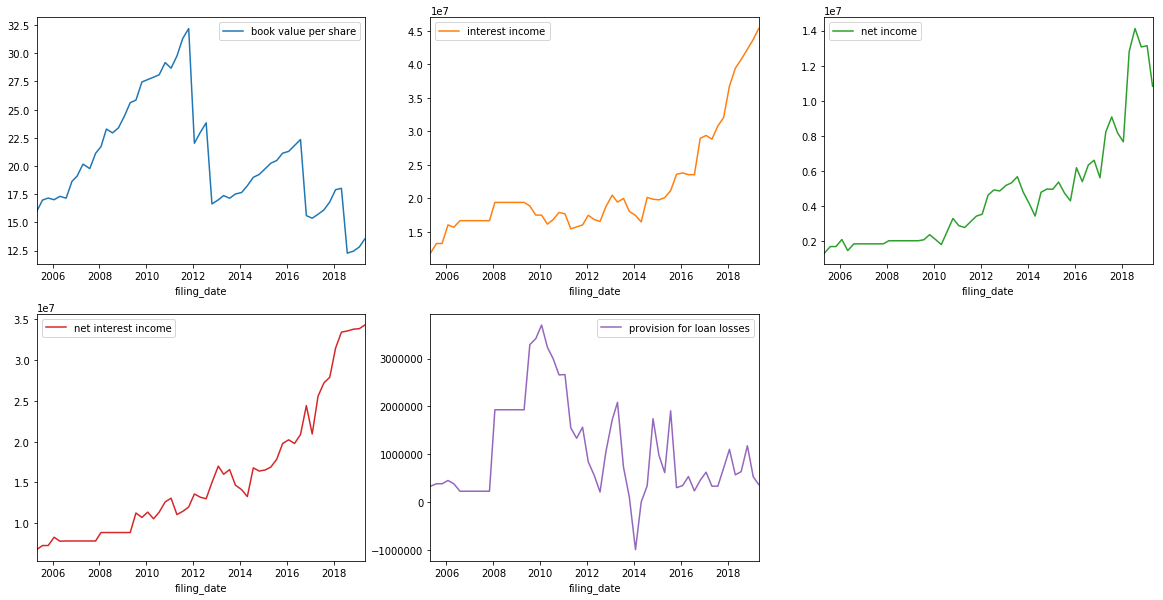

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                              
0000706129 interest income                                 2005Q3  missing   
           interest income            2006Q3 to 2007Q3: 5 periods  missing   
           interest income            2008Q1 to 2009Q1: 5 periods  missing   
           interest income                                 2009Q4  missing   
           interest income                                 2016Q2  missing   
           net income                                      2005Q3  missing   
           net income                 2006Q3 to 2007Q3: 5 periods  missing   
           net income                 2008Q1 to 2009Q1: 5 periods  missing   
           net income                                      2014Q3  missing   
           net interest income                             2005Q3  missing   
           net interest income        2006Q3 to 2007Q3: 5 periods  missing   
           net interest income        2008Q1 to 2009Q1: 5 periods  missing   
           provision for loan losses                       2005Q3  missing   
           provision for loan losses  2006Q3 to 2007Q3: 5 periods  missing   
           provision for loan losses  2008Q1 to 2009Q1: 5 periods  missing   
           total revenue                                     None    empty   

                                                 message  
cik        item                                           
0000706129 interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()